In [4]:
from methods.unet import UNet_encoder
import torch
from utils_loader import test_idea_dataloader_e2
config = {
    'batch_size': 128,
    'epochs':200,
    'fsl': False,
    'model': 'unet',
    'seed': 73054772,
    'dataset': 'physiq'
}
train_loader, val_loader, test_loader = test_idea_dataloader_e2(config)

device = 'cpu'
model = UNet_encoder(in_channels=6, out_channels=2, cnn_embed_dims=[64]).float().to(device)
model.load_state_dict(torch.load('saved_model/opportunity_unet_test_EXP2_B.pth', map_location=device))
model

['S20_E4_R_120_0_0.csv', 'S20_E4_R_120_0_1.csv', 'S20_E4_R_120_0_2.csv', 'S20_E4_R_120_0_3.csv', 'S20_E4_R_120_0_4.csv', 'S20_E4_R_120_0_5.csv', 'S20_E4_R_120_0_6.csv', 'S20_E4_R_120_0_7.csv', 'S20_E4_R_120_0_8.csv', 'S20_E4_R_120_0_9.csv', 'S21_E4_R_120_0_0.csv', 'S21_E4_R_120_0_1.csv', 'S21_E4_R_120_0_2.csv', 'S21_E4_R_120_0_3.csv', 'S21_E4_R_120_0_4.csv', 'S21_E4_R_120_0_5.csv', 'S21_E4_R_120_0_6.csv', 'S21_E4_R_120_0_7.csv', 'S21_E4_R_120_0_8.csv', 'S21_E4_R_120_0_9.csv', 'S22_E4_R_120_0_0.csv', 'S22_E4_R_120_0_1.csv', 'S22_E4_R_120_0_2.csv', 'S22_E4_R_120_0_3.csv', 'S22_E4_R_120_0_4.csv', 'S22_E4_R_120_0_5.csv', 'S22_E4_R_120_0_6.csv', 'S22_E4_R_120_0_7.csv', 'S22_E4_R_120_0_8.csv', 'S22_E4_R_120_0_9.csv', 'S23_E4_R_120_0_0.csv', 'S23_E4_R_120_0_1.csv', 'S23_E4_R_120_0_2.csv', 'S23_E4_R_120_0_3.csv', 'S23_E4_R_120_0_4.csv', 'S23_E4_R_120_0_5.csv', 'S23_E4_R_120_0_6.csv', 'S23_E4_R_120_0_7.csv', 'S23_E4_R_120_0_8.csv', 'S23_E4_R_120_0_9.csv', 'S24_E4_R_120_0_0.csv', 'S24_E4_R_120_0

UNet_encoder(
  (final_conv): Linear(in_features=64, out_features=2, bias=True)
  (backbone): Sequential(
    (0): ConvBlock(
      (conv1): Conv1d(6, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (relu): ReLU(inplace=True)
    )
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)

In [33]:
dataset = train_loader.dataset

data = dataset.data.view(-1, 50, 6)
label = dataset.label.view(-1, 50)
data1 = data[torch.where(label == 1)]
data0 = data[torch.where(label == 0)]
# data0 and data1 are type of torch.Tensor
# calculating mean, std, min, max, median, skewness, kurtosis for each channel
# mean
mean0 = data0.mean(dim=0)
mean1 = data1.mean(dim=0)
# std
std0 = data0.std(dim=0)
std1 = data1.std(dim=0)
# min
min0 = data0.min(dim=0).values
min1 = data1.min(dim=0).values
# max
max0 = data0.max(dim=0).values
max1 = data1.max(dim=0).values
# median
median0 = data0.median(dim=0).values
median1 = data1.median(dim=0).values
# skewness
skews0 = torch.mean(torch.pow((data0 - mean0) / std0, 3), dim=0)
skews1 = torch.mean(torch.pow((data1 - mean1) / std1, 3), dim=0)

# kurtosis
kurts0 = torch.mean(torch.pow((data0 - mean0) / std0, 4), dim=0)
kurts1 = torch.mean(torch.pow((data1 - mean1) / std1, 4), dim=0)

# print it:
print(f'mean0: {mean0}, mean1: {mean1}')
print(f'std0: {std0}, std1: {std1}')
print(f'min0: {min0}, min1: {min1}')
print(f'max0: {max0}, max1: {max1}')
print(f'median0: {median0}, median1: {median1}')
print(f'skews0: {skews0}, skews1: {skews1}')
print(f'kurts0: {kurts0}, kurts1: {kurts1}')




mean0: tensor([ 0.0155,  0.9692,  0.0389,  0.0159, -0.1292,  0.0027],
       dtype=torch.float64), mean1: tensor([0.0735, 0.9488, 0.0313, 0.0073, 0.0838, 0.0116], dtype=torch.float64)
std0: tensor([0.1740, 0.0539, 0.2546, 0.3971, 2.0713, 0.3628], dtype=torch.float64), std1: tensor([0.1859, 0.0648, 0.2877, 0.3502, 2.0348, 0.3679], dtype=torch.float64)
min0: tensor([-0.6368,  0.6776, -0.6636, -2.1088, -5.6972, -1.9227],
       dtype=torch.float64), min1: tensor([-0.4185,  0.5968, -0.7065, -1.4036, -5.3646, -1.4889],
       dtype=torch.float64)
max0: tensor([0.6108, 1.2475, 0.8268, 2.4366, 5.2482, 1.7744], dtype=torch.float64), max1: tensor([0.6297, 1.1025, 0.7125, 1.3429, 4.2766, 1.3672], dtype=torch.float64)
median0: tensor([ 0.0259,  0.9778,  0.0572,  0.0135, -0.0757, -0.0051],
       dtype=torch.float64), median1: tensor([ 0.0659,  0.9644,  0.0365,  0.0081,  0.1590, -0.0029],
       dtype=torch.float64)
skews0: tensor([-0.4145, -0.9568,  0.0650,  0.0780, -0.0366,  0.3053],
       dtyp

torch.Size([10, 50, 6]) torch.Size([10, 1])
torch.Size([10, 1, 50])


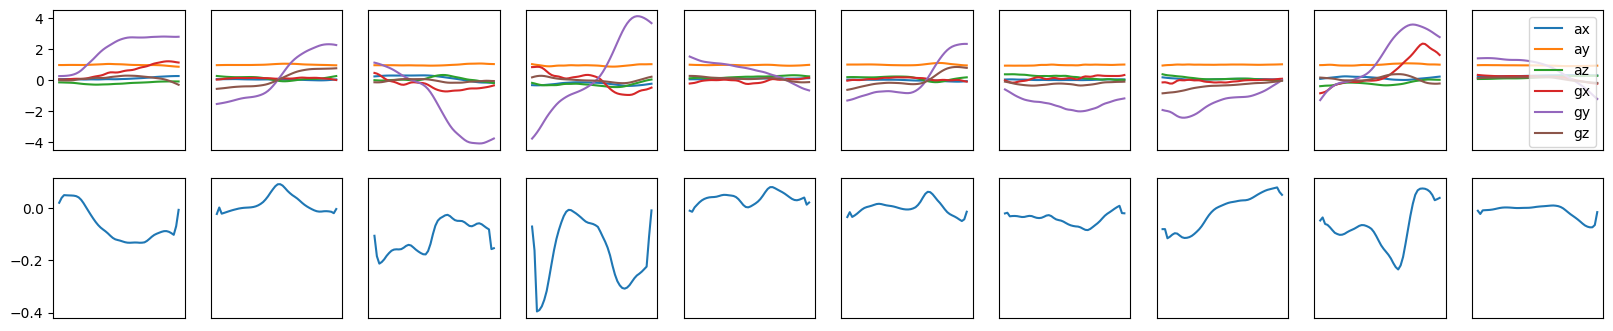

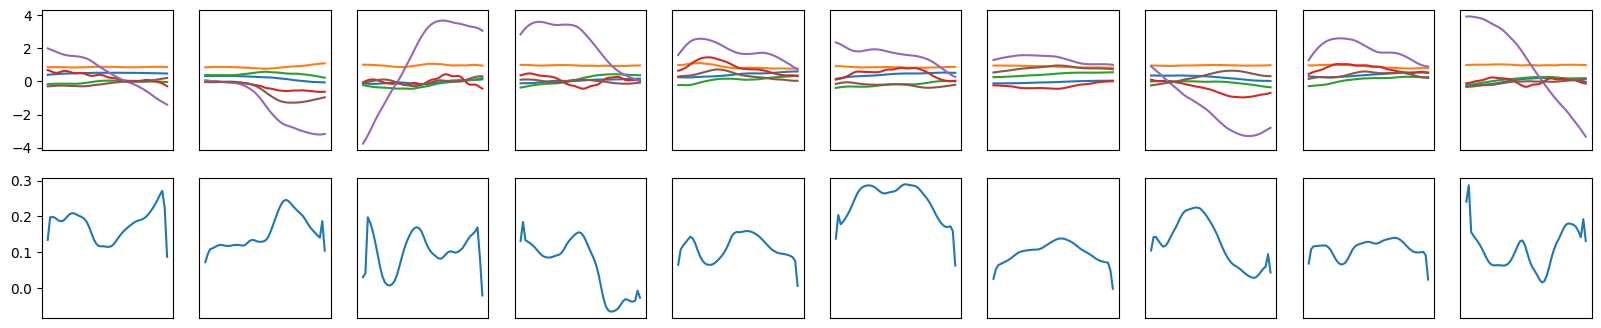

In [5]:
from captum.attr import LayerGradCam, LayerAttribution
from matplotlib import pyplot as plt
# print(model.backbone[-2].conv2)
layer_gc = LayerGradCam(model, model.backbone[-2].conv2)
# get one sample from 0 and 1 label:
inputs, labels = next(iter(test_loader))
input_0 = inputs[torch.where(labels == 0)[0]][0:10].float()
input_1 = inputs[torch.where(labels == 1)[0]][0:10].float()
label_0 = labels[torch.where(labels == 0)[0]][0:10].float().unsqueeze(1)
label_1 = labels[torch.where(labels == 1)[0]][0:10].float()
print(input_0.shape,label_0.shape)
attr_0 = layer_gc.attribute(input_0, target=0)
print(attr_0.shape)
# upsampled_attr = LayerAttribution.interpolate(attr, (6, 50))
# print(upsampled_attr.shape)
# use attr as color with cmap to visualize input:

fig, ax = plt.subplots(2, 10, figsize=(20, 4),sharex=True, sharey='row')
for i in range(10):
    for j in range(6):
        lb = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
        ax[0, i].plot(input_0[i,:, j].detach().numpy(), label=lb[j])
    ax[1, i].plot(attr_0[i, 0].detach().numpy())
    if i != 0:
        ax[0, i].yaxis.set_visible(False)
        ax[1, i].yaxis.set_visible(False)
    ax[0, i].xaxis.set_visible(False)
    ax[1, i].xaxis.set_visible(False)

ax[0, i].legend()
plt.show()
    
attr_1 = layer_gc.attribute(input_1, target=1)
fig, ax = plt.subplots(2, 10,  figsize=(20, 4),sharex=True, sharey='row')
for i in range(10):
    for j in range(6):
        lb = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
        ax[0, i].plot(input_1[i,:, j].detach().numpy(), label=lb[j])
    ax[1, i].plot(attr_1[i, 0].detach().numpy())
    if i != 0:
        ax[0, i].yaxis.set_visible(False)
        ax[1, i].yaxis.set_visible(False)
    ax[0, i].xaxis.set_visible(False)
    ax[1, i].xaxis.set_visible(False)

# ax[0].plot(input_0[0].detach().numpy())
# ax[1].plot(attr_0[0, 0].detach().numpy())
# plt.show()

# attr_1 = layer_gc.attribute(input_1, target=None)
# fig, ax = plt.subplots(2, 10)
# ax[0].plot(input_1[0].detach().numpy())
# ax[1].plot(attr_1[0, 0].detach().numpy())
# plt.show()

/Users/davidwang/opt/anaconda3/envs/research/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


torch.Size([10, 50, 6]) torch.Size([10, 50, 6])


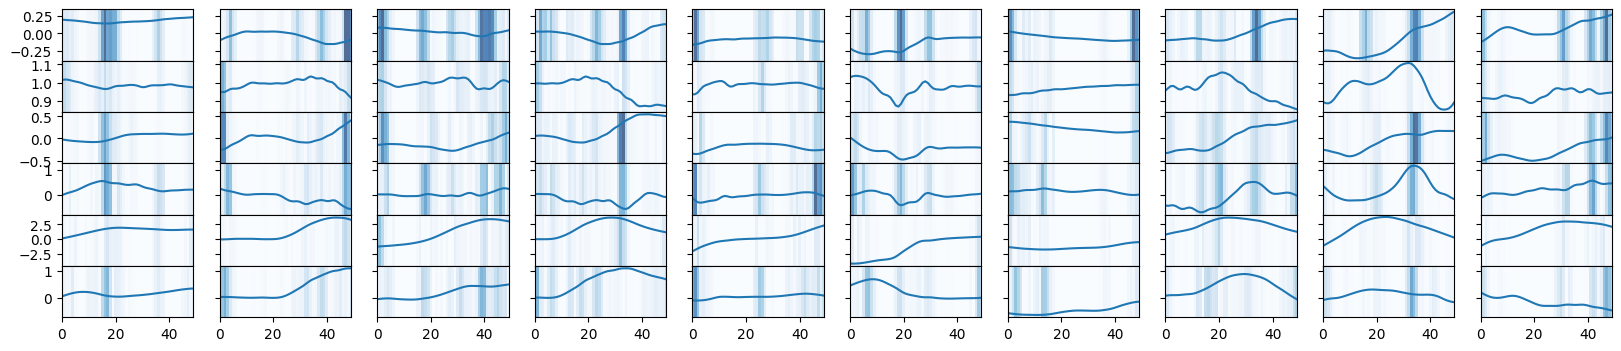

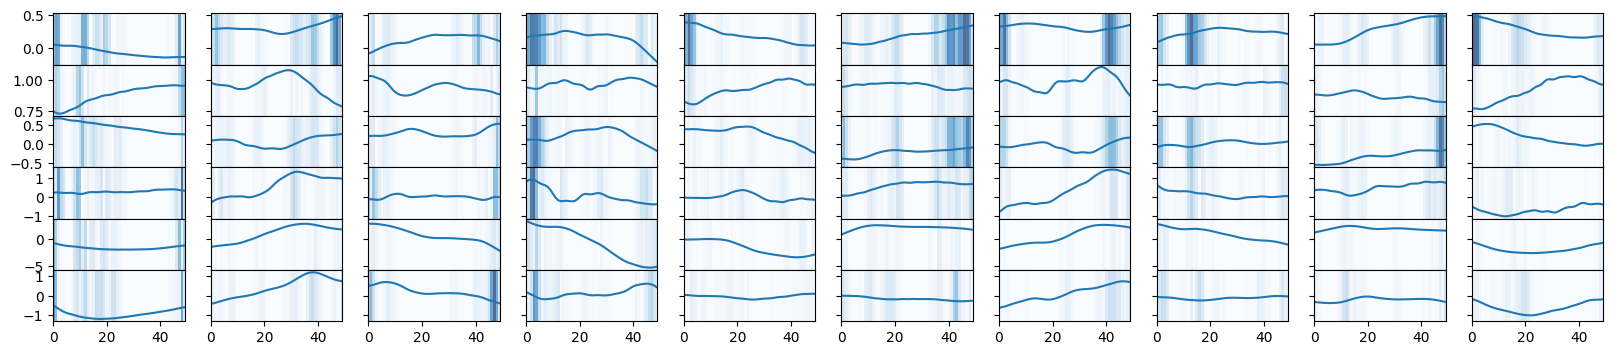

In [6]:
from captum.attr import Saliency
from matplotlib import pyplot as plt
from captum.attr import visualization as viz
# print(model.backbone[-2].conv2)
layer_gc = Saliency(model)
# get one sample from 0 and 1 label:
inputs, labels = next(iter(test_loader))
input_0 = inputs[torch.where(labels == 0)[0]][0:10].float()
input_1 = inputs[torch.where(labels == 1)[0]][0:10].float()
label_0 = labels[torch.where(labels == 0)[0]][0:10].float().unsqueeze(1)
label_1 = labels[torch.where(labels == 1)[0]][0:10].float()
attr_0 = layer_gc.attribute(input_0, target=0)
print(input_0.shape, attr_0.shape)
# upsampled_attr = LayerAttribution.interpolate(attr, (6, 50))
# print(upsampled_attr.shape)
# use attr as color with cmap to visualize input:

fig, axes = plt.subplots(6, 10, figsize=(20, 4),sharex=True, sharey='row')
for i in range(10):
    viz.visualize_timeseries_attr(attr_0[i].detach().numpy(), input_0[i].detach().numpy(), outlier_perc=0, method='overlay_individual', plt_fig_axis=(fig, axes[:, i]), use_pyplot=False)
# ax[0, i].legend()
plt.show()
fig, axes = plt.subplots(6, 10, figsize=(20, 4),sharex=True, sharey='row')
attr_1 = layer_gc.attribute(input_1, target=1)
for i in range(10):
    viz.visualize_timeseries_attr(attr_1[i].detach().numpy(), input_1[i].detach().numpy(), outlier_perc=0, method='overlay_individual', plt_fig_axis=(fig, axes[:, i]), use_pyplot=False)

# attr_1 = layer_gc.attribute(input_1, target=1)
# fig, ax = plt.subplots(2, 10,  figsize=(20, 4),sharex=True, sharey='row')
# for i in range(10):
#     for j in range(6):
#         lb = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
#         ax[0, i].plot(input_1[i,:, j].detach().numpy(), label=lb[j])
#     ax[1, i].plot(attr_1[i, 0].detach().numpy())
#     if i != 0:
#         ax[0, i].yaxis.set_visible(False)
#         ax[1, i].yaxis.set_visible(False)
#     ax[0, i].xaxis.set_visible(False)
#     ax[1, i].xaxis.set_visible(False)

# ax[0].plot(input_0[0].detach().numpy())
# ax[1].plot(attr_0[0, 0].detach().numpy())
# plt.show()

# attr_1 = layer_gc.attribute(input_1, target=None)
# fig, ax = plt.subplots(2, 10)
# ax[0].plot(input_1[0].detach().numpy())
# ax[1].plot(attr_1[0, 0].detach().numpy())
# plt.show()

In [19]:
import shap
import numpy as np
it = iter(test_loader)
inputs, labels = next(it)
inputss, labelss = next(it)
inputs = inputs.float()
inputss = inputss.float()
print(inputs.shape, inputss.shape)
# select a set of background examples to take an expectation over
background = inputs[np.random.choice(inputs.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
print(inputss[1:5].shape)
shap_values = e.shap_values(inputss[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -inputss[1:5])

torch.Size([128, 50, 6]) torch.Size([128, 50, 6])
torch.Size([4, 50, 6])


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.